In [4]:
import sys, os 
import numpy as np 
import pandas as pd
from src import utils, plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [466]:
from matplotlib import rcParams
default_font = 12
fs_title = 16
rcParams["font.family"] = "Arial"
rcParams["savefig.dpi"] = 300
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False
rcParams["axes.titlelocation"] = "left"
rcParams["axes.titleweight"] = "normal"
rcParams["font.size"] = default_font
trial_type_palette = ['tab:green', 'tab:red', 'tab:cyan', 'tab:orange', 'grey'] #rew #nrew #rew_test #nrew_test #GI
OMP_NUM_THREADS=1

In [2]:
VG11 = []
VG11.append({'mname': 'VG11', 'datexp': '2024_10_15', 'blk':'4'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_16', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_10_31', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_01', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_04', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_05', 'blk':'3'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_14', 'blk':'2'})
VG11.append({'mname': 'VG11', 'datexp': '2024_11_15', 'blk':'2'})
VG14 = []
VG14.append({'mname': 'VG14', 'datexp': '2024_10_15', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_10_16', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_21', 'blk':'2'})
VG14.append({'mname': 'VG14', 'datexp': '2024_11_23', 'blk':'2'})
VG15 = []
VG15.append({'mname': 'VG15', 'datexp': '2024_10_15', 'blk':'3'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_16', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_10_31', 'blk':'2'})
VG15.append({'mname': 'VG15', 'datexp': '2024_11_01', 'blk':'3'})
all_sessions = VG11 + VG14 + VG15
all_sessions

[{'mname': 'VG11', 'datexp': '2024_10_15', 'blk': '4'},
 {'mname': 'VG11', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_01', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_04', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_05', 'blk': '3'},
 {'mname': 'VG11', 'datexp': '2024_11_14', 'blk': '2'},
 {'mname': 'VG11', 'datexp': '2024_11_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_15', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_21', 'blk': '2'},
 {'mname': 'VG14', 'datexp': '2024_11_23', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_15', 'blk': '3'},
 {'mname': 'VG15', 'datexp': '2024_10_16', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_10_31', 'blk': '2'},
 {'mname': 'VG15', 'datexp': '2024_11_01', 'blk': '3'}]

Proof of concept:

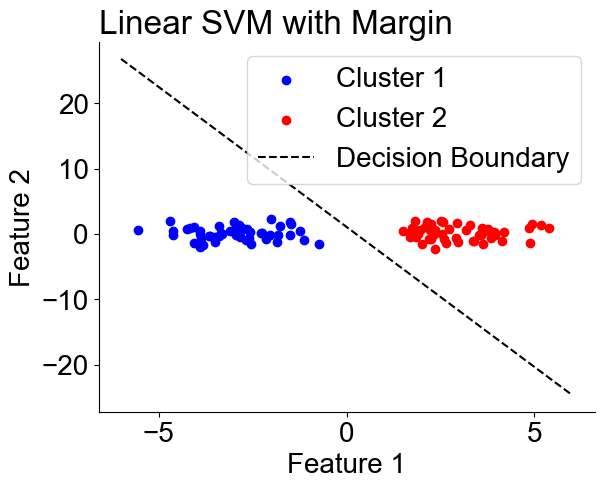

Margin: 2.576
Radius of Cluster 1: 2.739
Radius of Cluster 2: 2.520


In [10]:
from sklearn.svm import SVC
from sklearn.metrics.pairwise import euclidean_distances

# Generate two clusters
np.random.seed(0)
cluster1 = np.random.randn(50, 2) + np.array([-3, 0])
cluster2 = np.random.randn(50, 2) + np.array([3, 0])

X = np.vstack((cluster1, cluster2))
y = np.hstack((np.ones(50), -np.ones(50)))  # Labels: +1 for cluster1, -1 for cluster2

# Fit a linear SVM
svm = SVC(kernel='linear', C = 1) 
svm.fit(X, y)

# Recover the margin
w = svm.coef_[0]
margin = 2 / np.linalg.norm(w)

# Estimate cluster radius
centroid1 = np.mean(cluster1, axis=0)
centroid2 = np.mean(cluster2, axis=0)

radius1 = np.max(euclidean_distances(cluster1, centroid1.reshape(1, -1)))
radius2 = np.max(euclidean_distances(cluster2, centroid2.reshape(1, -1)))

# Plot decision boundary and clusters
xx = np.linspace(-6, 6, 100)
yy = - (w[0] * xx + svm.intercept_[0]) / w[1]

plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='red', label='Cluster 2')
plt.plot(xx, yy, 'k--', label="Decision Boundary")

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM with Margin")
plt.show()

# Print results
print(f"Margin: {margin:.3f}")
print(f"Radius of Cluster 1: {radius1:.3f}")
print(f"Radius of Cluster 2: {radius2:.3f}")

In [587]:
def get_X_y(m1, area_prefer_r, area_prefer_nr):
    A_pop = m1.interp_spks[area_prefer_r].mean(0)
    B_pop = m1.interp_spks[area_prefer_nr].mean(0)
    A_pop = A_pop[:, :125].mean(1)
    B_pop = B_pop[:, :125].mean(1)
    r_train = np.concatenate((m1.trial_dict['rewarded'][1::2], m1.trial_dict['rewarded test'][::2]))
    nr_train = np.concatenate((m1.trial_dict['non rewarded'][1::2], m1.trial_dict['non rewarded test'][::2]))
    train_trials = np.concatenate((r_train, nr_train))
    y_train = np.concatenate((np.zeros(len(r_train)), np.ones(len(nr_train))))

    r_test = m1.trial_dict['rewarded test'][1::2]
    nr_test =  m1.trial_dict['non rewarded test'][1::2]
    test_trials = np.concatenate((r_test, nr_test))
    y_test = np.concatenate((np.zeros(len(r_test)), np.ones(len(nr_test))))
    X_train = np.stack((A_pop[train_trials], B_pop[train_trials]))
    X_test = np.stack((A_pop[test_trials], B_pop[test_trials]))
    return X_train.T, X_test.T, y_train, y_test

In [467]:
from pathlib import Path
areas = ["V1", "medial", "lateral", "anterior"]
for sess in [all_sessions[0]]:
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    #m1.interp_spks = m1.interp_spks - m1.interp_spks.mean(1, keepdims=True)
    #lick_rate_df, lick_rate = utils.get_lick_rates(m1)
    ntrials = m1.interp_spks.shape[1]

Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])


In [468]:
utils.compute_dprime(m1, discrimination_region=(0,125), concatenate=False, remove_mean=False)

dprime saved in MouseObject.train_dp (neurons) using even trials


In [642]:
area = 'medial'
ia = utils.get_region_idx(m1.iarea, area)
selected_type = np.logical_not(m1.isred[:,0]).astype(bool)
pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) #tresh based on the area 
prefer_r = (m1.train_dp>=pstv_tsh)
prefer_nr = (m1.train_dp<=ngtv_tsh)
area_prefer_r = prefer_r * ia * selected_type
area_prefer_nr = prefer_nr * ia * selected_type
X_train, X_test, y_train, y_test = get_X_y(m1, area_prefer_r, area_prefer_nr)

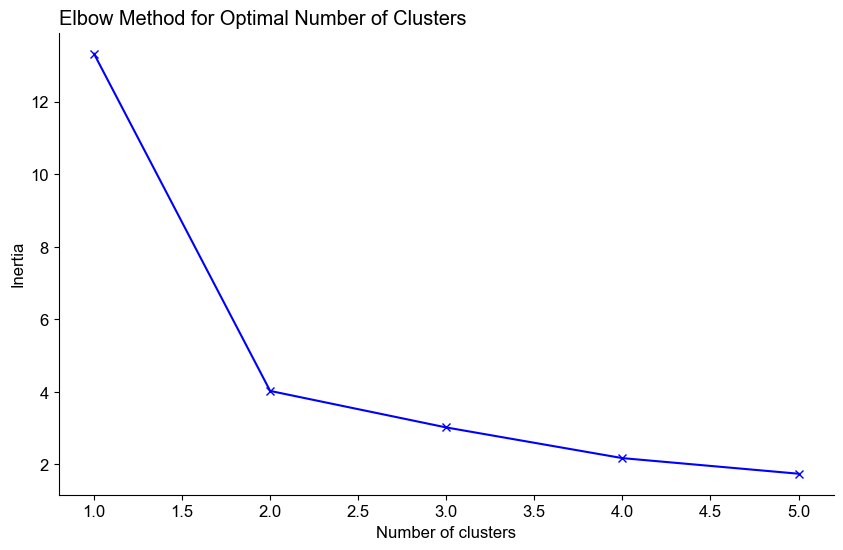

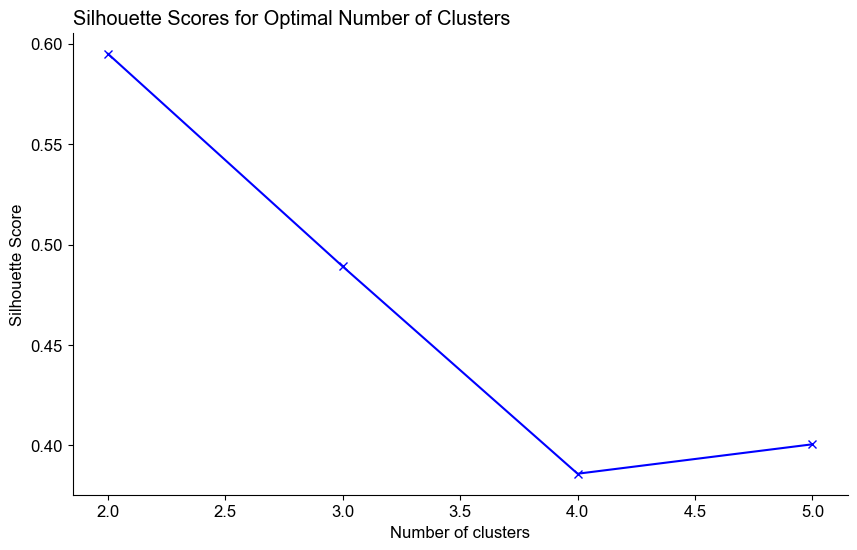

In [643]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


# Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.show()



In [644]:
# based on elbow method pick the optimal number of clusters
optimal_k  = K[1:][np.argmax(silhouette_scores)]

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=10)
kmeans.fit(X_train)

# Compute the distance between the cluster centroids
centroids = kmeans.cluster_centers_
distances = cdist(centroids, centroids, 'euclidean')

# Print the distances between the cluster centroids
print("Distances between cluster centroids:\n", distances)

Distances between cluster centroids:
 [[0.         0.43125735]
 [0.43125735 0.        ]]


In [651]:
centroids

array([[ 0.21242558, -0.08666618],
       [-0.02376736,  0.27416037]])

In [646]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

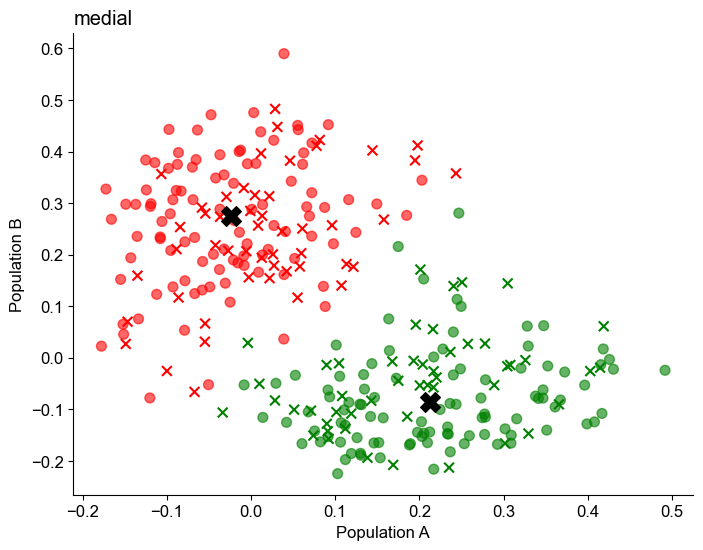

In [648]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0], X_train[:,1], c=np.where(y_train==0, 'g', 'r'), s=50, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=np.where(y_test==0, 'g', 'r'), s=50, marker='x')
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='X', s=200, label='Centroids')
plt.xlabel('Population A')
plt.ylabel('Population B')
plt.title('medial')
plt.show()

In [445]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        63
         1.0       0.83      0.87      0.85        63

    accuracy                           0.85       126
   macro avg       0.85      0.85      0.85       126
weighted avg       0.85      0.85      0.85       126



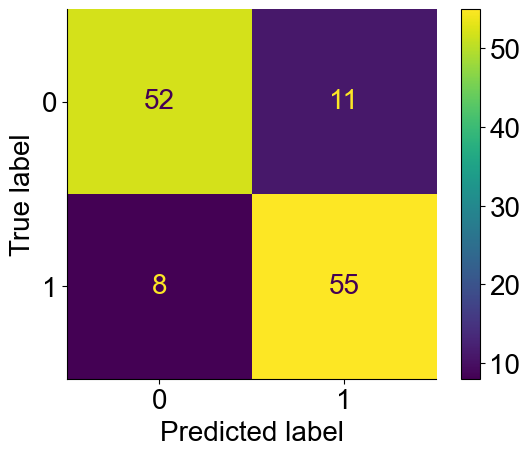

In [453]:
y_pred = kmeans.predict(X_test)

# Compute the classification metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Plot the mistakes
correct = y_test == y_pred
incorrect = ~correct

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.49      0.62        63
         1.0       0.64      0.90      0.75        63

    accuracy                           0.70       126
   macro avg       0.74      0.70      0.69       126
weighted avg       0.74      0.70      0.69       126



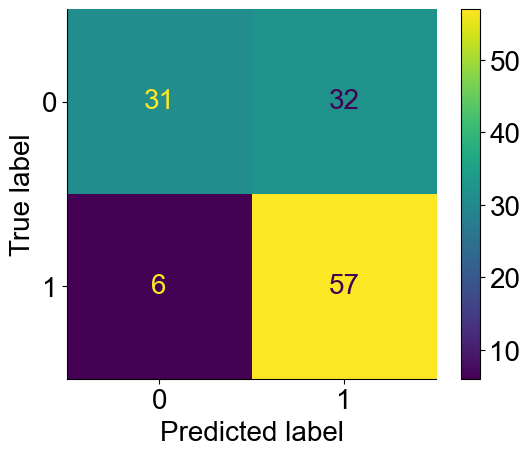

In [458]:
y_pred = kmeans.predict(X_test)

# Compute the classification metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

# Plot the mistakes
correct = y_test == y_pred
incorrect = ~correct

In [558]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.loc['macro avg', 'precision']
report_df.loc['macro avg', 'recall']
report_df.loc['macro avg', 'f1-score']

0.7325305291723202

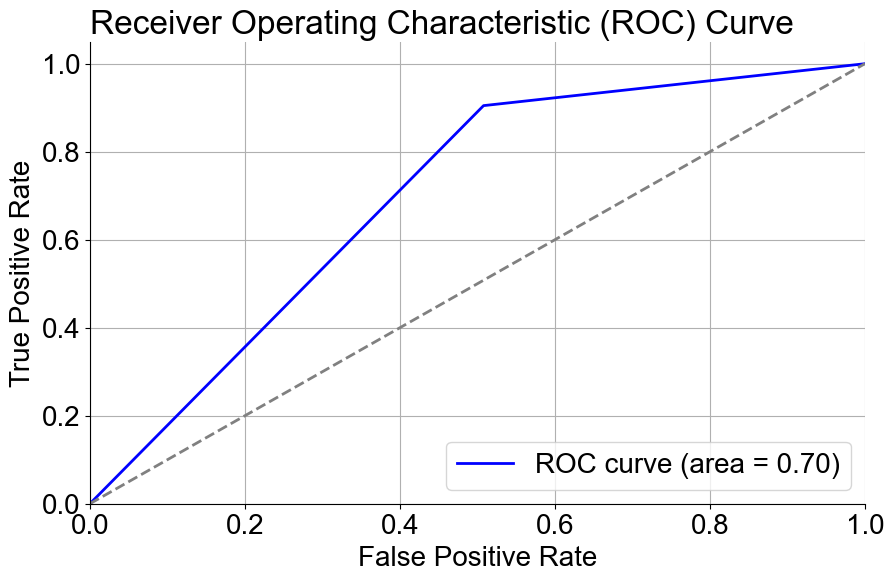

In [459]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [474]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [691]:
optimal_ks = np.empty((16, 4, 2))
max_silhouettes = np.empty((16, 4, 2))
silhouette_scores_2 = np.empty((16, 4, 2))
roc_auc_scores = np.empty((16, 4, 2))
precision = np.empty((16, 4, 2))
recall = np.empty((16, 4, 2))
f1 = np.empty((16, 4, 2))
accuracy = np.empty((16, 4, 2))
fprs = np.empty((16, 4, 2, 3))
tprs = np.empty((16, 4, 2, 3))
specificity = np.empty((16, 4, 2))  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
areas = ["V1", "medial", "lateral", "anterior"]
for iss, sess in enumerate(all_sessions):
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    ntrials = m1.interp_spks.shape[1]
    for iar, area in enumerate(areas):
        for cell_type in range(2):
            ia = utils.get_region_idx(m1.iarea, area)
            selected_type = np.logical_not(m1.isred[:,cell_type]).astype(bool)
            pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) #tresh based on the area 
            prefer_r = (m1.train_dp>=pstv_tsh)
            prefer_nr = (m1.train_dp<=ngtv_tsh)
            area_prefer_r = prefer_r * ia * selected_type
            area_prefer_nr = prefer_nr * ia * selected_type
            X_train, X_test, y_train, y_test = get_X_y(m1, area_prefer_r, area_prefer_nr)
            K = range(2, 5)
            silhouette_scores = []
            for k in K:
                kmeans = KMeans(n_clusters=k, random_state=10)
                kmeans.fit(X_train)
                silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
            optimal_k  = K[np.argmax(silhouette_scores)]
            optimal_ks[iss,iar,cell_type] = optimal_k
            max_silhouettes[iss,iar,cell_type] = np.max(silhouette_scores)
            silhouette_scores_2[iss,iar,cell_type] = silhouette_scores[0]
            kmeans = KMeans(n_clusters=2, random_state=10)
            kmeans.fit(X_train)
            y_pred = kmeans.predict(X_test)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            accuracy[iss,iar,cell_type] = accuracy_score(y_test, y_pred)
            precision[iss,iar,cell_type] = precision_score(y_test, y_pred)
            recall[iss,iar,cell_type] = recall_score(y_test, y_pred)
            f1[iss,iar,cell_type] = f1_score(y_test, y_pred)
            specificity[iss,iar,cell_type] = tn/(tn+fp)

Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_31\2
Existing mouse object has the following attr

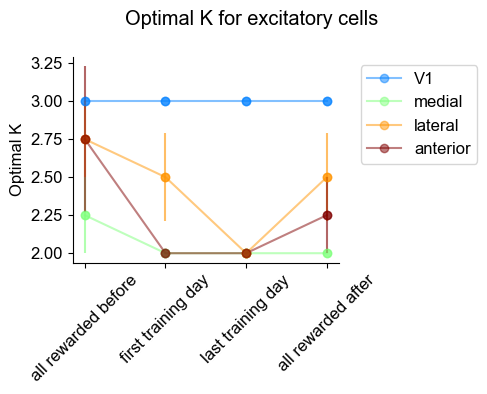

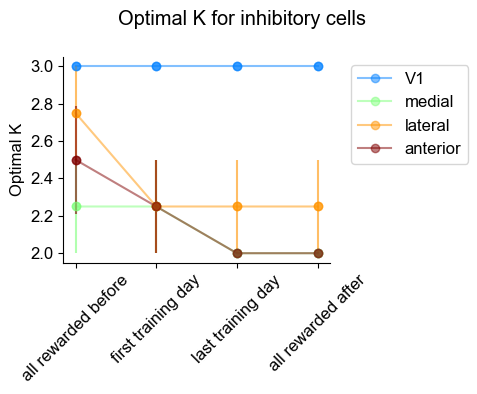

In [692]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_ks = np.empty((4, 4, 2))
ks_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_ks[iss] = optimal_ks[s].mean(0)
    ks_sems[iss] = sem(optimal_ks[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'Optimal K for {ctype[cell_type]} cells')
    for area in range(4):
        ks_mean = mean_ks[:, area, cell_type]
        ks_sem = ks_sems[:, area, cell_type]
        plt.plot(np.arange(4), ks_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), ks_mean, yerr=ks_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.ylabel('Optimal K')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

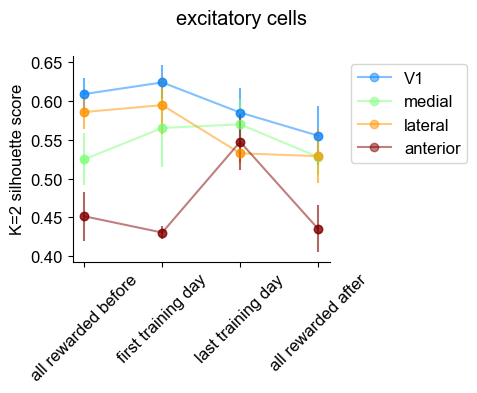

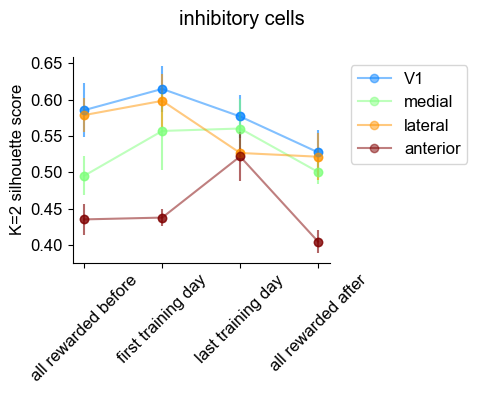

In [693]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_s = np.empty((4, 4, 2))
s_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_s[iss] = silhouette_scores_2[s].mean(0)
    s_sems[iss] = sem(silhouette_scores_2[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_s[:, area, cell_type]
        s_sem = s_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.ylabel('K=2 silhouette score')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

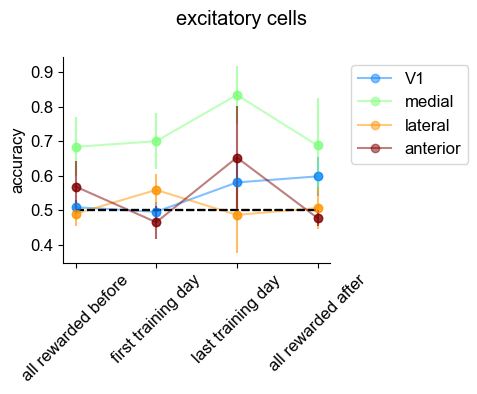

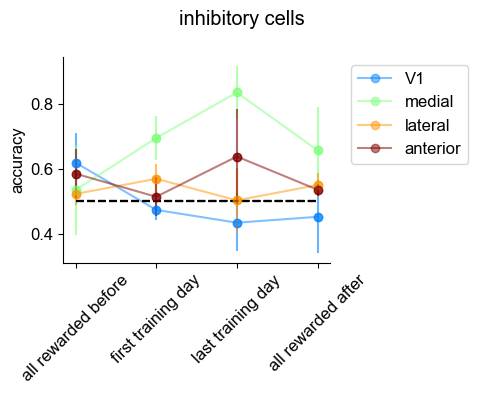

In [700]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_accuracy = np.empty((4, 4, 2))
accuracy_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_accuracy[iss] = accuracy[s].mean(0)
    accuracy_sems[iss] = sem(accuracy[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_accuracy[:, area, cell_type]
        s_sem = accuracy_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.ylabel('accuracy')
        plt.hlines(0.5, 0, 3, color='k', linestyle='--')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

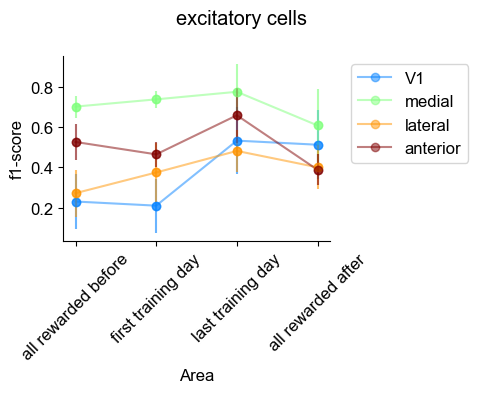

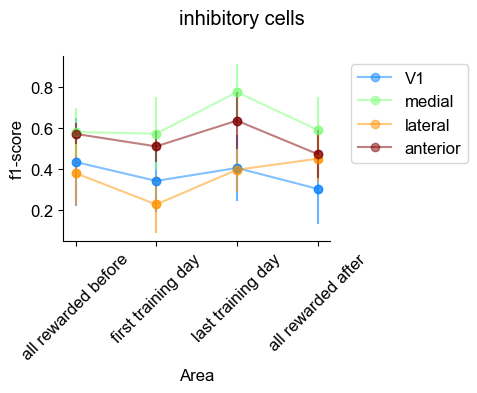

In [695]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_f1 = np.empty((4, 4, 2))
f1_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_f1[iss] = f1[s].mean(0)
    f1_sems[iss] = sem(f1[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_f1[:, area, cell_type]
        s_sem = f1_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('f1-score')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

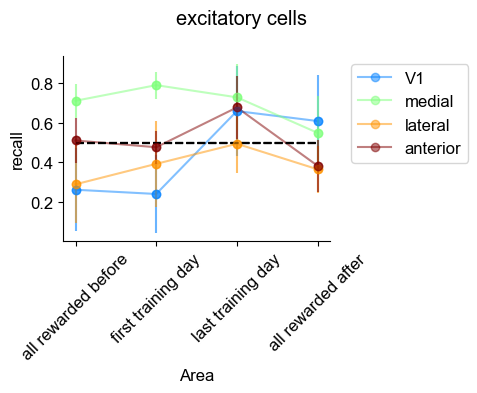

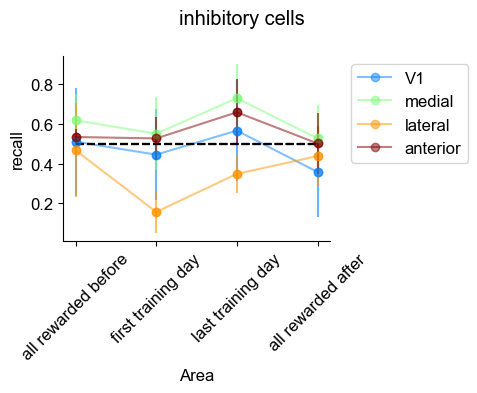

In [701]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_recall = np.empty((4, 4, 2))
recall_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_recall[iss] = recall[s].mean(0)
    recall_sems[iss] = sem(recall[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_recall[:, area, cell_type]
        s_sem = recall_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.hlines(0.5, 0, 3, color='k', linestyle='--')
        plt.xlabel('Area')
        plt.ylabel('recall')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

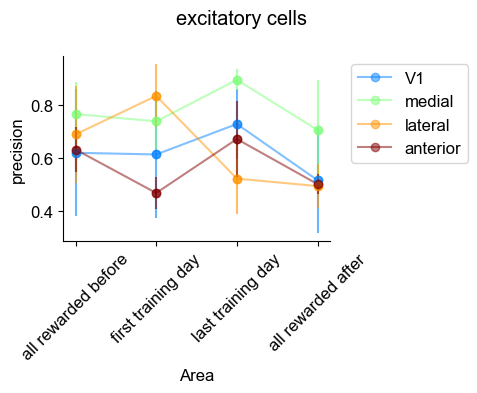

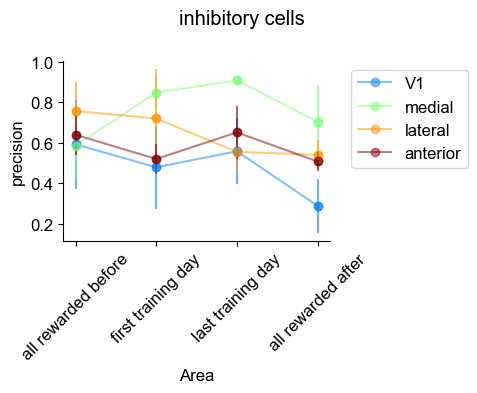

In [697]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_precision = np.empty((4, 4, 2))
precision_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_precision[iss] = precision[s].mean(0)
    precision_sems[iss] = sem(precision[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_precision[:, area, cell_type]
        s_sem = precision_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('precision')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

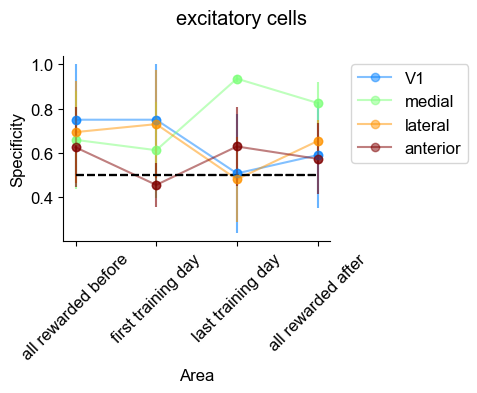

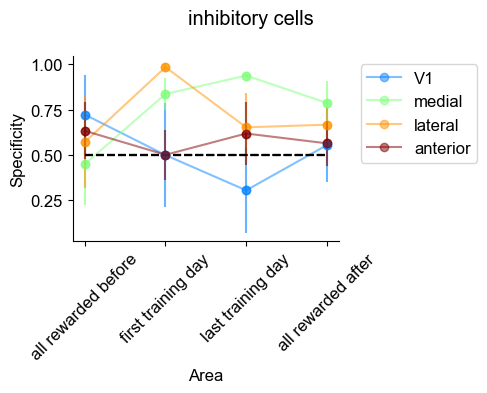

In [702]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_specificity = np.empty((4, 4, 2))
specificity_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_specificity[iss] = specificity[s].mean(0)
    specificity_sems[iss] = sem(specificity[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_specificity[:, area, cell_type]
        s_sem = specificity_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.hlines(0.5, 0, 3, color='k', linestyle='--')
        plt.ylabel('Specificity')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [683]:
distances_cats2 = np.empty((16, 4, 2))
radius2 = np.empty((16, 4, 2, 2))
compactness2 = np.empty((16, 4, 2, 2))
from sklearn.metrics.pairwise import euclidean_distances
areas = ["V1", "medial", "lateral", "anterior"]
for iss, sess in enumerate(all_sessions):
    name = sess['mname']
    date = sess['datexp']
    blk = sess['blk']
    m1 = utils.load_mouse(name, date, blk, load_neurons=True, interp_behav=True, load_retinotopy=True, mdl_path=r"D:\mouseobj")
    ntrials = m1.interp_spks.shape[1]
    for iar, area in enumerate(areas):
        for cell_type in range(2):
            ia = utils.get_region_idx(m1.iarea, area)
            selected_type = np.logical_not(m1.isred[:,cell_type]).astype(bool)
            pstv_tsh, ngtv_tsh = utils.get_dp_thresholds(m1.train_dp[ia*selected_type], tsh=95) #tresh based on the area 
            prefer_r = (m1.train_dp>=pstv_tsh)
            prefer_nr = (m1.train_dp<=ngtv_tsh)
            area_prefer_r = prefer_r * ia * selected_type
            area_prefer_nr = prefer_nr * ia * selected_type
            A_pop = m1.interp_spks[area_prefer_r].mean(0)
            B_pop = m1.interp_spks[area_prefer_nr].mean(0)
            A_pop = A_pop[:, :125].mean(1)
            B_pop = B_pop[:, :125].mean(1)
            r = m1.trial_dict['rewarded test']
            nr =  m1.trial_dict['non rewarded test']
            y = np.concatenate((np.zeros(len(r)), np.ones(len(nr))))
            test_trials = np.concatenate((r, nr))
            X = np.stack((A_pop[test_trials], B_pop[test_trials])).T
            A_cat = X[y==0]
            B_cat = X[y==1]
            A_centroid = np.array([A_cat[:,0].mean(0),A_cat[:,1].mean(0)])
            B_centroid = np.array([B_cat[:,0].mean(0),B_cat[:,1].mean(0)])
            centroids = np.stack((A_centroid, B_centroid))
            distances_cats2[iss, iar, cell_type] = cdist(centroids, centroids, 'euclidean')[0,1]
            radius2[iss, iar, cell_type, 0] = euclidean_distances(A_cat, A_centroid.reshape(1, -1)).max()
            compactness2[iss, iar, cell_type, 0] = euclidean_distances(A_cat, A_centroid.reshape(1, -1)).mean()
            radius2[iss, iar, cell_type, 1] = euclidean_distances(B_cat, B_centroid.reshape(1, -1)).max()
            compactness2[iss, iar, cell_type, 1] = euclidean_distances(B_cat, B_centroid.reshape(1, -1)).mean()

Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_15\4
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_16\2
Existing mouse object has the following attributes:
dict_keys(['name', 'datexp', 'blk', 'data_path', '_timeline', '_data_var', '_settings', '_timestamps', '_trial_info', '_spks', '_ypos', '_xpos', '_iplane', '_stat', '_ops', '_snr', 'xy_t', 'iarea', 'iregion', 'outline', 'frameselector', 'isred', 'interp_spks', 'trial_dict', 'train_dp'])
Checking if model object exists ...
Loading mouse object from D:\mouseobj\VG11\2024_10_31\2
Existing mouse object has the following attr

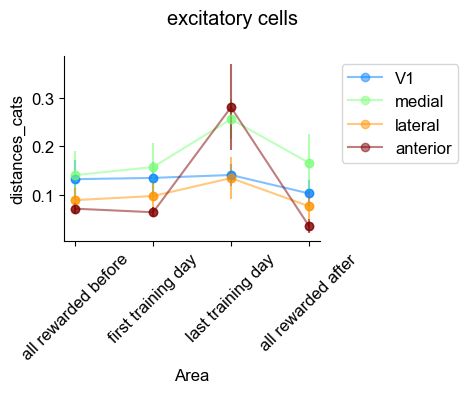

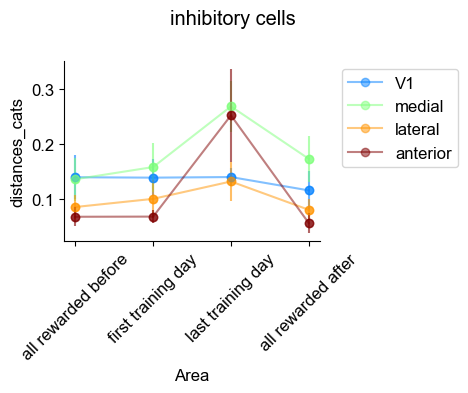

In [684]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_distances_cats = np.empty((4, 4, 2))
distances_cats_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_distances_cats[iss] = distances_cats2[s].mean(0)
    distances_cats_sems[iss] = sem(distances_cats2[s], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_distances_cats[:, area, cell_type]
        s_sem = distances_cats_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('distances_cats')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

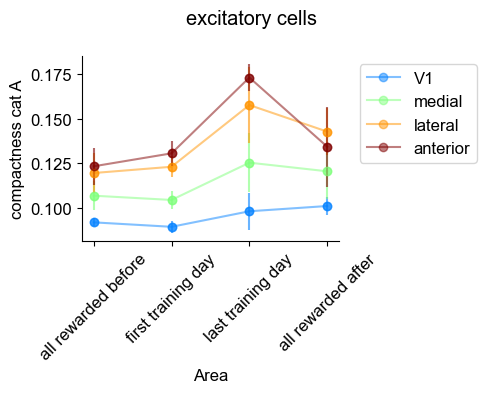

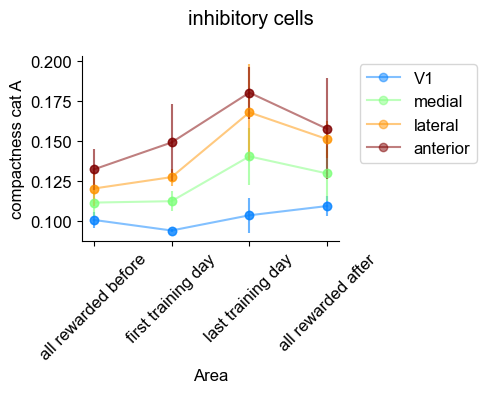

In [685]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_compactness = np.empty((4, 4, 2))
compactness_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_compactness[iss] = compactness2[s,:,:,0].mean(0)
    compactness_sems[iss] = sem(compactness2[s,:,:,0], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_compactness[:, area, cell_type]
        s_sem = compactness_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('compactness cat A')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

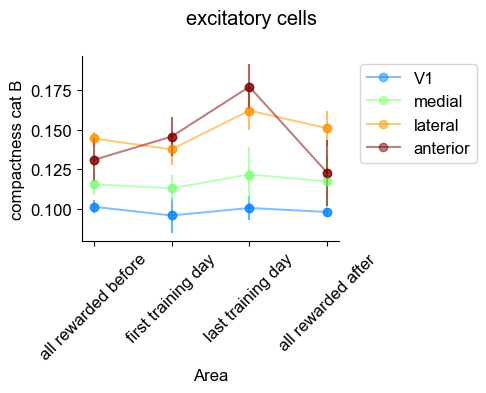

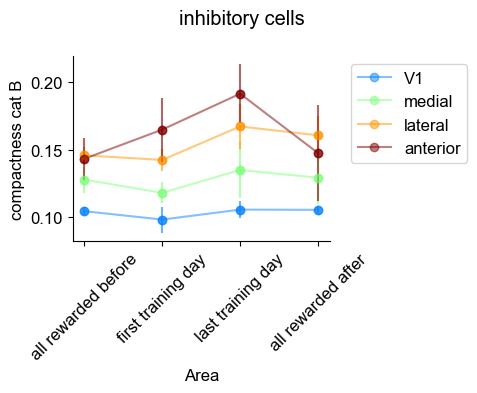

In [687]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_compactness = np.empty((4, 4, 2))
compactness_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_compactness[iss] = compactness2[s,:,:,1].mean(0)
    compactness_sems[iss] = sem(compactness2[s,:,:,1], 0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_compactness[:, area, cell_type]
        s_sem = compactness_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('compactness cat B')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

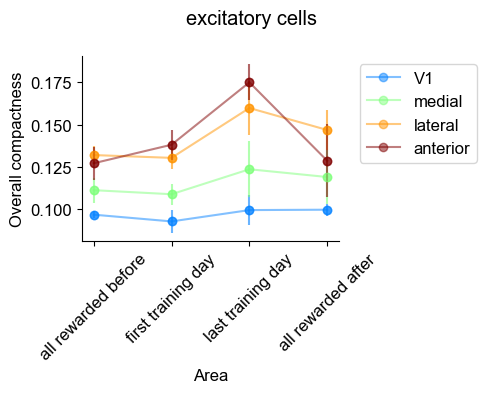

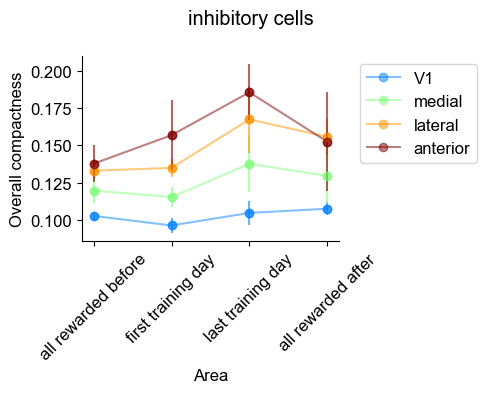

In [703]:
sess_names = ["all rewarded before", "first training day", "last training day", "all rewarded after"]
ctype = ["excitatory", "inhibitory"]
region_colors = ['#0683FF','#7EFF7B','#FF9400','#800000']
from scipy.stats import sem
first_day = np.arange(0,16,4)
second_day = np.arange(1,16,4)
third_day = np.arange(2,16,4)
fourth_day = np.arange(3,16,4)
sessions = [first_day, second_day, third_day, fourth_day]
mean_compactness = np.empty((4, 4, 2))
compactness_sems = np.empty((4, 4, 2))
for iss, s in enumerate(sessions):
    mean_compactness[iss] =  compactness2[s,:,:,:].mean((0,3))
    compactness_sems[iss] = sem(compactness2[s,:,:,:].mean(3), axis=0)
for cell_type in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4), sharey=True)
    fig.suptitle(f'{ctype[cell_type]} cells')
    for area in range(4):
        s_mean = mean_compactness[:, area, cell_type]
        s_sem = compactness_sems[:, area, cell_type]
        plt.plot(np.arange(4), s_mean, 'o-', color=region_colors[area], label=areas[area], alpha=0.5)
        plt.errorbar(np.arange(4), s_mean, yerr=s_sem, fmt='o', alpha=0.6, color=region_colors[area])
        plt.xlabel('Area')
        plt.ylabel('Overall compactness')
        plt.xticks(range(4), sess_names, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()